## Convolutional Neural Networks

Using LeNet Architecture Model for CNN on MNIST Dataset Recognition & using Dropout Layer to reduce Overfitting Problem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

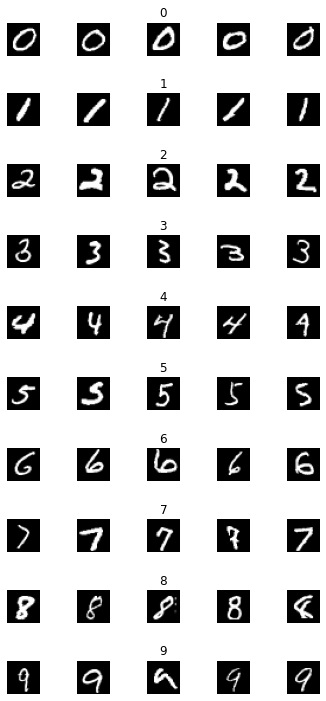

In [ ]:
num_of_samples=[]
	 
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
   for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


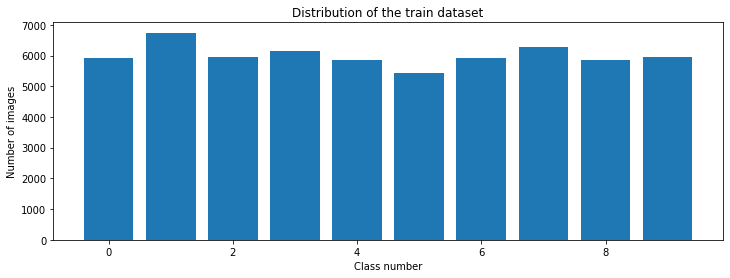

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation='relu'))
    # Padding is not used as MNIST dataset consists of centered hand-written digits, 
    # as we aren't interested in outer edges of the images since they do not contain any info
    # Strides are also not used here
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(15, (3, 3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
    # Using Dropout layer to fix overfitting problem
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.2462 - acc: 0.9217 - val_loss: 0.0528 - val_acc: 0.9842
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0671 - acc: 0.9795 - val_loss: 0.0391 - val_acc: 0.9880
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0589 - acc: 0.9817 - val_loss: 0.0466 - val_acc: 0.9870
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0410 - val_acc: 0.9882
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0459 - acc: 0.9856 - val_loss: 0.0373 - val_acc: 0.9903
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0411 - acc: 0.9866 - val_loss: 0.0360 - val_acc: 0.9890
Epoch 7/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0390 - acc: 0.9879 - val_loss: 0.0358 - val_acc:

Text(0.5, 0, 'epoch')

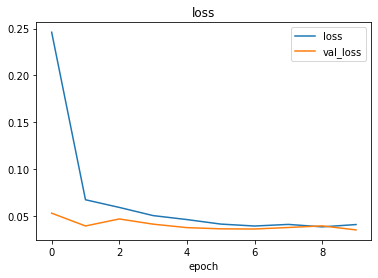

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

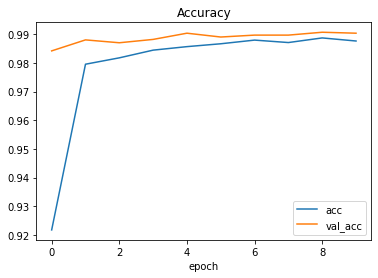

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

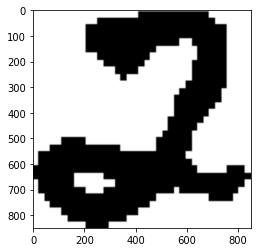

In [ ]:
import requests
from PIL import Image
url = 'https://github.com/aviralchharia/Image-Classification-/blob/master/Handwritten-digit-2.png?raw=true'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

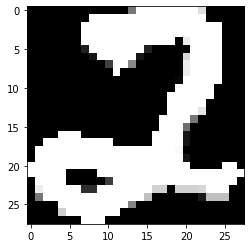

In [ ]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap = plt.get_cmap("gray"))

In [ ]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [ ]:
prediction = model.predict_classes(img)
print("Predicted Digit: ", str(prediction))

Predicted Digit:  [2]


In [ ]:
score  = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test Score: ', score[0])
print('Test Accuracy', score[1])

<class 'list'>
Test Score:  0.035993331874426306
Test Accuracy 0.9902
